In [16]:
from glob import glob

import os
import cv2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from skimage.filters import threshold_otsu
from skimage.measure import regionprops, label
from sklearn.model_selection import train_test_split
matplotlib.rc('figure', figsize=(17, 12))

In [17]:
!which python

/opt/anaconda3/envs/quoc_py36/bin/python


In [20]:
def h_crop_roi(img, debug=False):
    blur = cv2.GaussianBlur(img, (7, 7), 0)
    rgb = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
    gray_s = hsv[:, :, 1]

    thresh = threshold_otsu(gray_s)
    # print(thresh)
    mask = gray_s > thresh

    kernel = np.ones((15, 15), np.uint8)
    closed = cv2.morphologyEx(mask.astype(np.uint8) * 255, cv2.MORPH_CLOSE, kernel)
    print(closed)
    if debug:
        f, axarr = plt.subplots(2, 2, sharex=True, sharey=True)
        axarr[0, 0].imshow(rgb)
        axarr[0, 1].imshow(gray_s)
        axarr[1, 0].imshow(mask)
        axarr[1, 1].imshow(closed)
        plt.show()

    labeled = label(closed)
    props = regionprops(labeled)
    props = [p for p in props if not np.any(np.array(p.bbox) == 0)]
    # bbox = props[0].bbox

    max_r = 0
    max_idx = -1
    for count, prop in enumerate(props):
        count
        bb = prop.bbox
        h0, w0, h1, w1 = bb
        h = h1 - h0
        w = w1 - w0
        if h > w:
            r = 1.2 * 0.5 * h
        else:
            r = 1.2 * 0.5 * w
        if max_r < r:
            max_r = r
            max_idx = count
    
    bbox = props[max_idx].bbox
    h0, w0, h1, w1 = bbox
    h = h1 - h0
    w = w1 - w0
    if h > w:
        r = 1.2 * 0.5 * h
    else:
        r = 1.2 * 0.5 * w
    ch = (h0 + h1) * 0.5
    cw = (w0 + w1) * 0.5
    c = np.int32([ch, cw])

    s = c - np.int32([r, r])
    e = c + np.int32([r, r])
    print(r)
    print(c)
    print(s[0])
    print(e[0])
    print(s[1])
    print(e[1])
#     img[closed==0] = 255
    cropped = img[s[0]:e[0], s[1]:e[1]]
    if debug:
        plt.imshow(cropped)
        plt.show()

    return cropped

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


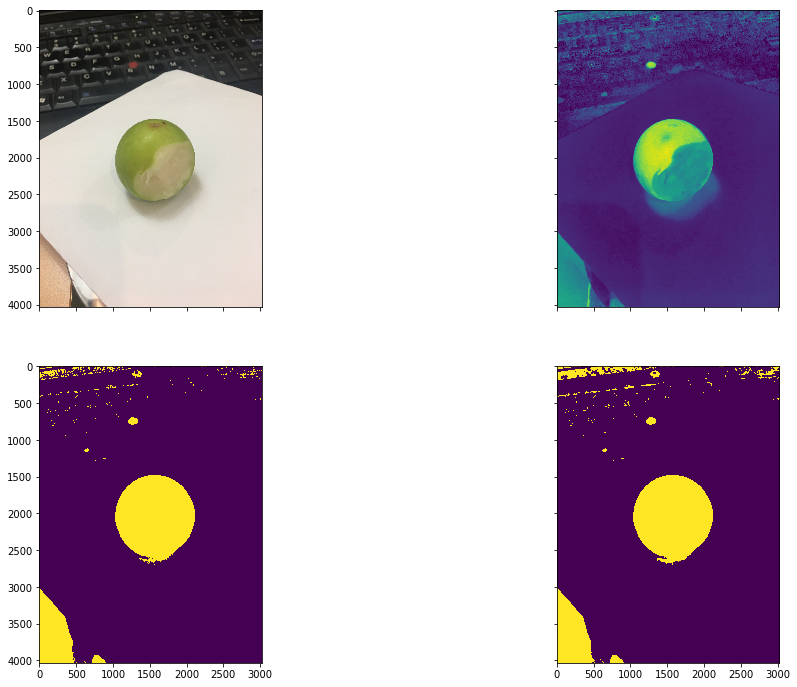

735.6
[2091 1576]
1356
2826
841
2311


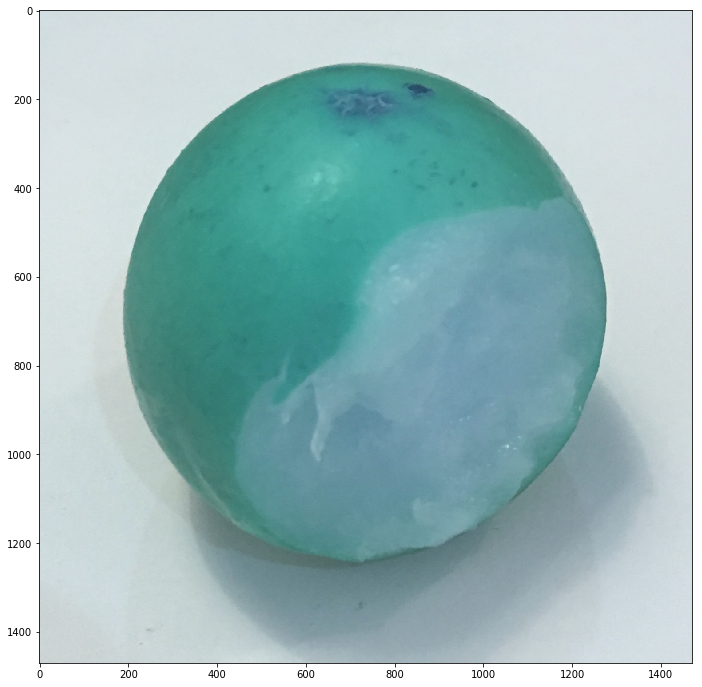

True

In [22]:
img_path = 'IMG_4775.JPG'
img = cv2.imread(img_path)
cropped = h_crop_roi(img, debug=True)
cv2.imwrite("ng1.jpg", cropped)